In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/MyDrive/dataset'

/content/drive/MyDrive/dataset


In [ ]:
# !unzip -qq '/content/drive/MyDrive/dataset/model_line.zip'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, Flatten, BatchNormalization
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from keras.utils.np_utils import to_categorical

# BandPass

## 데이터셋 가져오기

In [ ]:
train_band = pd.read_csv('/content/drive/MyDrive/dataset/model_line/band/train_band_line.csv', header=None)
valid_band = pd.read_csv('/content/drive/MyDrive/dataset/model_line/band/valid_band_line.csv', header=None)
test_band = pd.read_csv('/content/drive/MyDrive/dataset/model_line/band/test_band_line.csv', header=None)

## label 지정

In [ ]:
label = []
for i in range(100):
  for j in range(240):
    label.append(i+1)

train_band[256] = label

In [ ]:
label_v = []
for i in range(100):
  for j in range(60):
    label_v.append(i+1)

valid_band[256] = label_v

In [ ]:
label_t = []
for i in range(100):
  for j in range(60):
    label_t.append(i+1)

test_band[256] = label_t

## 데이터 전처리

합치고 랜덤으로 셔플

In [ ]:
df = pd.concat([train_band, valid_band, test_band], axis=0)
df

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,-0.031820,-0.015874,-0.001172,0.011249,0.020713,0.026974,0.030190,0.030831,0.029559,0.027102,...,-0.035003,-0.034647,-0.033418,-0.031305,-0.028545,-0.025565,-0.022868,-0.020891,-0.019891,1
1,-0.019872,-0.020594,-0.021637,-0.022515,-0.022798,-0.022202,-0.020644,-0.018236,-0.015233,-0.011971,...,-0.072854,-0.070401,-0.067539,-0.064716,-0.062285,-0.060443,-0.059208,-0.058448,-0.057940,1
2,-0.057454,-0.056822,-0.055984,-0.054985,-0.053945,-0.052999,-0.052250,-0.051733,-0.051414,-0.051213,...,-0.059447,-0.057278,-0.056011,-0.055424,-0.055246,-0.055239,-0.055275,-0.055352,-0.055577,1
3,-0.056099,-0.057035,-0.058395,-0.060043,-0.061694,-0.062967,-0.063465,-0.062887,-0.061116,-0.058272,...,-0.071806,-0.071741,-0.071302,-0.070367,-0.068861,-0.066758,-0.064085,-0.060936,-0.057487,1
4,0.053295,0.053439,0.055066,0.059409,0.067278,0.078961,0.094216,0.112361,0.132422,0.153321,...,0.150072,0.164082,0.180535,0.199168,0.219491,0.240843,0.262473,0.283635,0.303673,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.004594,0.009590,0.017135,0.025880,0.034416,0.041620,0.046867,0.050103,0.051777,0.052674,...,0.016083,-0.009705,-0.032355,-0.052129,-0.069386,-0.084460,-0.097612,-0.109031,-0.118868,100
5996,0.017135,0.017694,0.019432,0.022356,0.026302,0.030971,0.035976,0.040891,0.045291,0.048799,...,0.044268,0.089211,0.134152,0.171846,0.194955,0.197629,0.176948,0.133840,0.073184,100
5997,-0.061678,-0.060521,-0.059365,-0.058206,-0.057080,-0.056067,-0.055283,-0.054843,-0.054816,-0.055175,...,-0.050592,-0.052317,-0.052018,-0.049965,-0.046587,-0.042433,-0.038139,-0.034393,-0.031913,100
5998,-0.039287,-0.039374,-0.039054,-0.038510,-0.037933,-0.037494,-0.037327,-0.037532,-0.038153,-0.039167,...,-0.060069,-0.061489,-0.061986,-0.061385,-0.059834,-0.057803,-0.055972,-0.055062,-0.055631,100


In [ ]:
dff = df.sample(frac=1, random_state= 82) #, random_state= 82

나누기

In [ ]:
X_train_band = dff.iloc[0:24000]
X_val_band = dff.iloc[24000:30000]
X_test_band = dff.iloc[30000:36000]

In [ ]:
y_train_band = to_categorical(X_train_band[256])
y_test_band = to_categorical(X_test_band[256])
y_val_band = to_categorical(X_val_band[256])

In [ ]:
X_train_band.drop([256], axis=1, inplace=True)
X_val_band.drop([256], axis=1, inplace=True)
X_test_band.drop([256], axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


입력데이터 3차원으로 reshape

In [ ]:
X_train_band = X_train_band.values.reshape(24000, 256,1)
X_val_band = X_val_band.values.reshape(6000, 256,1)
X_test_band = X_test_band.values.reshape(6000, 256,1)

## 모델

In [ ]:
def model():
  model = Sequential()
  model.add(Conv1D(256, 8, padding='same', activation='relu', input_shape= (256,1)))
  model.add(MaxPooling1D())
  model.add(Conv1D(256, 8, padding='same', activation='relu'))
  model.add(MaxPooling1D())
  model.add(Conv1D(64, 8, padding='same',activation='relu'))
  model.add(MaxPooling1D())
  model.add(Conv1D(64, 8, padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(Flatten())
  model.add(Dense(101, activation='softmax')) # activation='softmax'

  model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
  model.summary()
  return model

In [ ]:
model = model()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_16 (Conv1D)          (None, 256, 256)          2304      
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 128, 256)         0         
 g1D)                                                            
                                                                 
 conv1d_17 (Conv1D)          (None, 128, 256)          524544    
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 64, 256)          0         
 g1D)                                                            
                                                                 
 conv1d_18 (Conv1D)          (None, 64, 64)            131136    
                                                                 
 max_pooling1d_14 (MaxPoolin  (None, 32, 64)          

### 모델 학습

In [ ]:
history = model.fit(X_train_band, y_train_band, batch_size = 750, epochs = 1000, verbose = 1, validation_data=(X_val_band, y_val_band))

Epoch 1/1000
32/32 [==============================] - 5s 125ms/step - loss: 0.0098 - accuracy: 0.0235 - val_loss: 0.0098 - val_accuracy: 0.0125
Epoch 2/1000
32/32 [==============================] - 4s 120ms/step - loss: 0.0095 - accuracy: 0.0767 - val_loss: 0.0098 - val_accuracy: 0.0295
Epoch 3/1000
32/32 [==============================] - 4s 120ms/step - loss: 0.0085 - accuracy: 0.2511 - val_loss: 0.0096 - val_accuracy: 0.0390
Epoch 4/1000
32/32 [==============================] - 4s 121ms/step - loss: 0.0069 - accuracy: 0.4591 - val_loss: 0.0095 - val_accuracy: 0.0663
Epoch 5/1000
32/32 [==============================] - 4s 122ms/step - loss: 0.0052 - accuracy: 0.6308 - val_loss: 0.0092 - val_accuracy: 0.1188
Epoch 6/1000
32/32 [==============================] - 4s 121ms/step - loss: 0.0035 - accuracy: 0.7721 - val_loss: 0.0082 - val_accuracy: 0.2815
Epoch 7/1000
32/32 [==============================] - 4s 122ms/step - loss: 0.0022 - accuracy: 0.8613 - val_loss: 0.0070 - val_accuracy:

### 모델 저장

In [ ]:
model.save('bandpass.h5')

### 모델 평가

In [ ]:
model.evaluate(X_test_band, y_test_band)

188/188 [==============================] - 1s 4ms/step - loss: 2.8434e-04 - accuracy: 0.9827


[0.0002843379625119269, 0.9826666712760925]

### 학습 그래푸

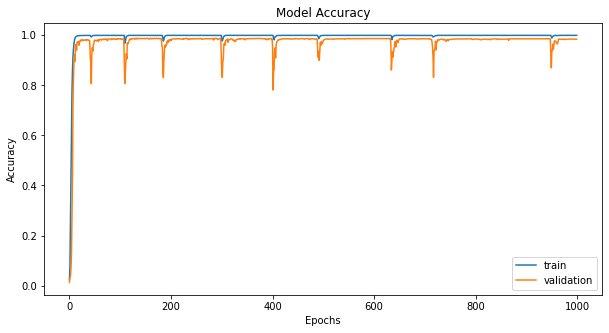

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='best')
plt.show()

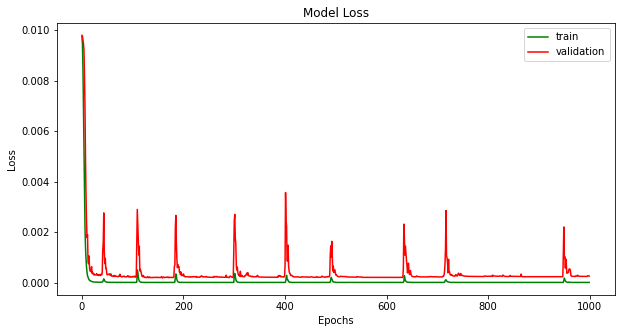

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], color = 'g')
plt.plot(history.history['val_loss'], color = 'r')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'validation'], loc='best')
plt.show()

# HighPass

## 데이터셋 가져오기

In [ ]:
train_high = pd.read_csv('/content/drive/MyDrive/dataset/model_line/high/train_high_line.csv', header=None)
valid_high = pd.read_csv('/content/drive/MyDrive/dataset/model_line/high/valid_high_line.csv', header=None)
test_high = pd.read_csv('/content/drive/MyDrive/dataset/model_line/high/test_high_line.csv', header=None)

## label 지정

In [ ]:
label = []
for i in range(100):
  for j in range(240):
    label.append(i+1)

train_high[256] = label

In [ ]:
label_v = []
for i in range(100):
  for j in range(60):
    label_v.append(i+1)

valid_high[256] = label_v
test_high[256] = label_v

## 데이터 전처리

합치고 랜덤으로 셔플

In [ ]:
df = pd.concat([train_high, valid_high, test_high], axis=0)
df

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,-0.011566,0.077466,0.083038,0.015121,-0.024216,0.026618,0.112943,0.067018,-0.022367,0.035899,...,-0.080380,-0.088511,0.005901,-0.000657,-0.066214,-0.061900,-0.011674,0.064162,-0.020820,1
1,-0.105411,0.006199,0.035219,-0.038238,-0.087385,-0.047431,0.057264,0.011541,-0.063622,-0.054354,...,-0.102607,-0.121740,-0.038993,-0.017367,-0.083201,-0.108995,-0.055099,0.004076,-0.050829,1
2,-0.124635,-0.101820,-0.004986,-0.009573,-0.097080,-0.078287,-0.033934,0.011788,-0.100740,-0.105788,...,-0.087241,-0.110820,-0.037730,0.000719,-0.066072,-0.119163,-0.068725,0.003512,-0.040881,1
3,-0.070665,-0.110059,-0.041584,0.011091,-0.073945,-0.116371,-0.065348,0.005895,-0.075523,-0.138241,...,-0.074093,-0.113909,-0.113364,-0.053677,-0.015389,-0.088530,-0.122749,-0.019986,-0.033522,1
4,0.164484,0.137004,0.165505,0.176745,0.186086,0.149056,0.190527,0.256168,0.278809,0.242770,...,0.168813,0.158065,0.156737,0.236019,0.242662,0.237836,0.242839,0.272923,0.371568,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,-0.006009,0.035463,0.031765,0.034116,0.041276,0.040276,0.043814,0.049392,0.014919,0.082215,...,0.025207,0.017123,-0.047797,-0.036055,-0.080359,-0.080849,-0.131536,-0.108450,-0.119801,100
5996,-0.004209,-0.021269,0.014421,0.066451,0.034102,0.022313,0.039954,0.015126,0.016828,0.095201,...,-0.007017,-0.001635,0.073427,0.119448,0.241599,0.262261,0.279691,0.237252,0.092732,100
5997,-0.052598,-0.055633,-0.055577,-0.032002,-0.095826,-0.056251,-0.088205,-0.003379,-0.041393,-0.062797,...,-0.060236,-0.027453,-0.048409,-0.078653,-0.040536,-0.018418,-0.062418,-0.006057,0.010865,100
5998,-0.039242,-0.044322,-0.024571,-0.017190,-0.044918,-0.038277,-0.066724,-0.033992,-0.049339,-0.018386,...,-0.019348,-0.078060,-0.082112,-0.081604,-0.070175,-0.080676,-0.072666,0.004694,-0.046835,100


In [ ]:
dff = df.sample(frac=1, random_state= 82) #, random_state= 82

나누기

In [ ]:
X_train_high = dff.iloc[0:24000]
X_val_high = dff.iloc[24000:30000]
X_test_high = dff.iloc[30000:36000]

In [ ]:
y_train_high = to_categorical(X_train_high[256])
y_test_high = to_categorical(X_test_high[256])
y_val_high = to_categorical(X_val_high[256])

In [ ]:
X_train_high.drop([256], axis=1, inplace=True)
X_val_high.drop([256], axis=1, inplace=True)
X_test_high.drop([256], axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


입력데이터 3차원으로 reshape

In [ ]:
X_train_high = X_train_high.values.reshape(24000, 256,1)
X_val_high = X_val_high.values.reshape(6000, 256,1)
X_test_high = X_test_high.values.reshape(6000, 256,1)

## 모델

In [ ]:
def model():
  model = Sequential()
  model.add(Conv1D(256, 8, padding='same', activation='relu', input_shape= (256,1)))
  model.add(MaxPooling1D())
  model.add(Conv1D(256, 8, padding='same', activation='relu'))
  model.add(MaxPooling1D())
  model.add(Conv1D(64, 8, padding='same',activation='relu'))
  model.add(MaxPooling1D())
  model.add(Conv1D(64, 8, padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(Flatten())
  model.add(Dense(101, activation='softmax')) # activation='softmax'

  model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
  model.summary()
  return model

In [ ]:
model = model()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_20 (Conv1D)          (None, 256, 256)          2304      
                                                                 
 max_pooling1d_15 (MaxPoolin  (None, 128, 256)         0         
 g1D)                                                            
                                                                 
 conv1d_21 (Conv1D)          (None, 128, 256)          524544    
                                                                 
 max_pooling1d_16 (MaxPoolin  (None, 64, 256)          0         
 g1D)                                                            
                                                                 
 conv1d_22 (Conv1D)          (None, 64, 64)            131136    
                                                                 
 max_pooling1d_17 (MaxPoolin  (None, 32, 64)          

### 모델 학습

In [ ]:
history = model.fit(X_train_high, y_train_high, batch_size = 750, epochs = 1000, verbose = 1, validation_data=(X_val_high, y_val_high))

Epoch 1/1000
32/32 [==============================] - 5s 128ms/step - loss: 0.0097 - accuracy: 0.0269 - val_loss: 0.0098 - val_accuracy: 0.0137
Epoch 2/1000
32/32 [==============================] - 4s 122ms/step - loss: 0.0093 - accuracy: 0.1081 - val_loss: 0.0097 - val_accuracy: 0.0153
Epoch 3/1000
32/32 [==============================] - 4s 124ms/step - loss: 0.0079 - accuracy: 0.3338 - val_loss: 0.0096 - val_accuracy: 0.0352
Epoch 4/1000
32/32 [==============================] - 4s 125ms/step - loss: 0.0058 - accuracy: 0.5738 - val_loss: 0.0094 - val_accuracy: 0.1018
Epoch 5/1000
32/32 [==============================] - 4s 122ms/step - loss: 0.0039 - accuracy: 0.7387 - val_loss: 0.0088 - val_accuracy: 0.1750
Epoch 6/1000
32/32 [==============================] - 4s 123ms/step - loss: 0.0027 - accuracy: 0.8250 - val_loss: 0.0079 - val_accuracy: 0.3057
Epoch 7/1000
32/32 [==============================] - 4s 123ms/step - loss: 0.0019 - accuracy: 0.8802 - val_loss: 0.0060 - val_accuracy:

### 모델 저장

In [ ]:
model.save('highpass.h5')

### 모델 평가

In [ ]:
model.evaluate(X_test_high, y_test_high)

188/188 [==============================] - 1s 4ms/step - loss: 1.3707e-04 - accuracy: 0.9918


[0.00013706625031773, 0.9918333292007446]

### 학습 그래푸

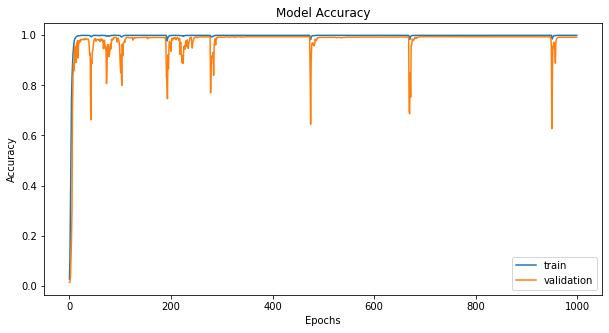

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='best')
plt.show()

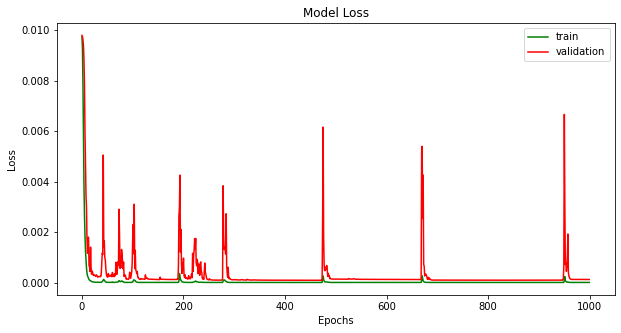

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], color = 'g')
plt.plot(history.history['val_loss'], color = 'r')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'validation'], loc='best')
plt.show()

# lowPass

## 데이터셋 가져오기

In [ ]:
train_low = pd.read_csv('/content/drive/MyDrive/dataset/model_line/low/train_low_line.csv', header=None)
valid_low = pd.read_csv('/content/drive/MyDrive/dataset/model_line/low/valid_low_line.csv', header=None)
test_low = pd.read_csv('/content/drive/MyDrive/dataset/model_line/low/test_low_line.csv', header=None)

## label 지정

In [ ]:
label = []
for i in range(100):
  for j in range(240):
    label.append(i+1)

train_low[256] = label

In [ ]:
label_v = []
for i in range(100):
  for j in range(60):
    label_v.append(i+1)

valid_low[256] = label_v
test_low[256] = label_v

## 데이터 전처리

합치고 랜덤으로 셔플

In [ ]:
df = pd.concat([train_low, valid_low, test_low], axis=0)
df

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,1.697478,1.713703,1.728594,1.741144,1.750717,1.757105,1.760490,1.761353,1.760349,1.758191,...,1.733012,1.733423,1.734708,1.736879,1.739700,1.742739,1.745491,1.747515,1.748556,1
1,1.748610,1.747925,1.746924,1.746097,1.745874,1.746535,1.748158,1.750626,1.753678,1.756978,...,1.694451,1.696899,1.699745,1.702543,1.704941,1.706748,1.707952,1.708690,1.709187,1
2,1.709674,1.710317,1.711171,1.712183,1.713227,1.714166,1.714897,1.715389,1.715680,1.715858,...,1.722441,1.724729,1.726115,1.726820,1.727122,1.727259,1.727362,1.727430,1.727353,1
3,1.726979,1.726187,1.724966,1.723451,1.721925,1.720776,1.720402,1.721109,1.723015,1.726001,...,1.739826,1.739925,1.740406,1.741383,1.742927,1.745059,1.747751,1.750910,1.754365,1
4,1.889883,1.889929,1.891485,1.895719,1.903396,1.914786,1.929653,1.947339,1.966906,1.987309,...,1.914361,1.928167,1.944398,1.962799,1.982890,2.004016,2.025433,2.046399,2.066255,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1.613963,1.619528,1.627568,1.636760,1.645732,1.653393,1.659145,1.662945,1.665238,1.666797,...,1.755844,1.730389,1.708044,1.688545,1.671541,1.656708,1.643799,1.632639,1.623080,100
5996,1.696360,1.696858,1.698535,1.701395,1.705272,1.709867,1.714797,1.719637,1.723966,1.727412,...,1.699782,1.744423,1.789141,1.826705,1.849760,1.852416,1.831714,1.788555,1.727819,100
5997,1.547967,1.549320,1.550668,1.552017,1.553337,1.554553,1.555551,1.556214,1.556469,1.556341,...,1.592691,1.591059,1.591456,1.593591,1.597004,1.601126,1.605314,1.608896,1.611187,100
5998,1.615198,1.615168,1.615529,1.616101,1.616700,1.617167,1.617373,1.617227,1.616682,1.615755,...,1.595455,1.593952,1.593380,1.593925,1.595443,1.597461,1.599283,1.600176,1.599565,100


In [ ]:
dff = df.sample(frac=1) #, random_state= 82

나누기

In [ ]:
X_train_low = dff.iloc[0:24000]
X_val_low = dff.iloc[24000:30000]
X_test_low = dff.iloc[30000:36000]

In [ ]:
y_train_low = to_categorical(X_train_low[256])
y_test_low = to_categorical(X_test_low[256])
y_val_low = to_categorical(X_val_low[256])

In [ ]:
X_train_low.drop([256], axis=1, inplace=True)
X_val_low.drop([256], axis=1, inplace=True)
X_test_low.drop([256], axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


입력데이터 3차원으로 reshape

In [ ]:
X_train_low = X_train_low.values.reshape(24000, 256,1)
X_val_low = X_val_low.values.reshape(6000, 256,1)
X_test_low = X_test_low.values.reshape(6000, 256,1)

## 모델

In [ ]:
def model():
  model = Sequential()
  model.add(Conv1D(256, 8, padding='same', activation='relu', input_shape= (256,1)))
  model.add(MaxPooling1D())
  model.add(Conv1D(256, 8, padding='same', activation='relu'))
  model.add(MaxPooling1D())
  model.add(Conv1D(64, 8, padding='same',activation='relu'))
  model.add(MaxPooling1D())
  model.add(Conv1D(64, 8, padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(Flatten())
  model.add(Dense(101, activation='softmax')) # activation='softmax'

  model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
  model.summary()
  return model

In [ ]:
model = model()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_36 (Conv1D)          (None, 256, 256)          2304      
                                                                 
 max_pooling1d_27 (MaxPoolin  (None, 128, 256)         0         
 g1D)                                                            
                                                                 
 conv1d_37 (Conv1D)          (None, 128, 256)          524544    
                                                                 
 max_pooling1d_28 (MaxPoolin  (None, 64, 256)          0         
 g1D)                                                            
                                                                 
 conv1d_38 (Conv1D)          (None, 64, 64)            131136    
                                                                 
 max_pooling1d_29 (MaxPoolin  (None, 32, 64)          

### 모델 학습

In [ ]:
history = model.fit(X_train_low, y_train_low, batch_size = 750, epochs = 1000, verbose = 1, validation_data=(X_val_low, y_val_low))

Epoch 1/1000
32/32 [==============================] - 5s 123ms/step - loss: 0.0098 - accuracy: 0.0115 - val_loss: 0.0098 - val_accuracy: 0.0113
Epoch 2/1000
32/32 [==============================] - 4s 118ms/step - loss: 0.0098 - accuracy: 0.0169 - val_loss: 0.0098 - val_accuracy: 0.0103
Epoch 3/1000
32/32 [==============================] - 4s 118ms/step - loss: 0.0098 - accuracy: 0.0214 - val_loss: 0.0098 - val_accuracy: 0.0120
Epoch 4/1000
32/32 [==============================] - 4s 121ms/step - loss: 0.0098 - accuracy: 0.0292 - val_loss: 0.0098 - val_accuracy: 0.0202
Epoch 5/1000
32/32 [==============================] - 4s 118ms/step - loss: 0.0097 - accuracy: 0.0454 - val_loss: 0.0100 - val_accuracy: 0.0108
Epoch 6/1000
32/32 [==============================] - 4s 119ms/step - loss: 0.0096 - accuracy: 0.0720 - val_loss: 0.0098 - val_accuracy: 0.0132
Epoch 7/1000
32/32 [==============================] - 4s 120ms/step - loss: 0.0094 - accuracy: 0.1111 - val_loss: 0.0118 - val_accuracy:

### 모델 저장

In [ ]:
model.save('lowpass.h5')

### 모델 평가

In [ ]:
model.evaluate(X_test_low, y_test_low)

188/188 [==============================] - 1s 5ms/step - loss: 3.1663e-04 - accuracy: 0.9803


[0.00031662589753977954, 0.9803333282470703]

### 학습 그래푸

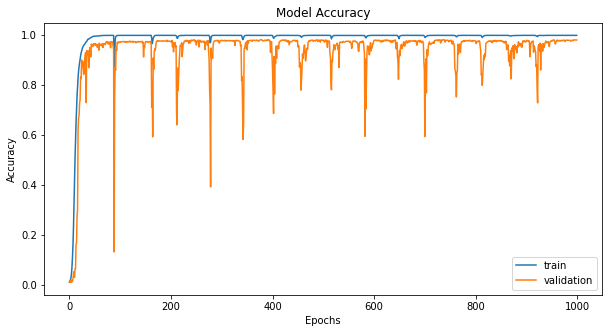

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='best')
plt.show()

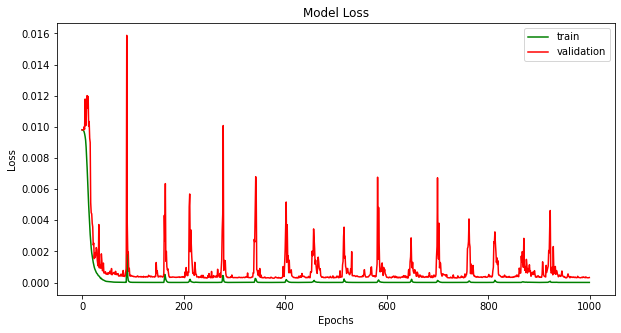

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], color = 'g')
plt.plot(history.history['val_loss'], color = 'r')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'validation'], loc='best')
plt.show()